<a href="https://colab.research.google.com/github/stephenwadams/cbe67701-uncertainty-quantification/blob/master/03_02_Contributed_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 3.2

Stephen Adams
6/18/2020

The following example shows an application of principal component analysis (PCA), also known as random variable reduction, the Hotelling transform, or proper orthogonal decomposition (see page 76 of textbook). PCA is commonly used in machine learning to reduce the number of components, thereby speeding up machine learning algorithms.

In this example, a scree plot will be generated. A scree plot shows how much of the variance in a data set can be attributed to each principal component (see Fig. 3.14 in the textbook).

In [30]:
from google.colab import files
uploaded = files.upload()


Saving quarterbacks3.csv to quarterbacks3 (1).csv


The data set being analyzed is the statistics of the starting quarterbacks for all 32 NFL teams in the 2019 season. The statistics can be found at https://www.pro-football-reference.com/years/2019/passing.htm. The salaries were also included and can be found at https://www.spotrac.com/nfl/rankings/2019/average/quarterback/.

In [31]:
# Import all libraries
import pandas as pd
import io
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Put data into array
qb_data = pd.read_csv(io.StringIO(uploaded['quarterbacks3.csv'].decode('utf-8')),delimiter="\t")
# Preview
print (qb_data.head())

   Data          Player Team  ...  Sack%  4th Quarter Comeback  Game Winning Drive
0     1      Jared Goff  LAR  ...    3.4                   1.0                   2
1     2  Jameis Winston  TAM  ...    7.0                   2.0                   2
2     3       Matt Ryan  ATL  ...    7.2                   3.0                   2
3     4       Tom Brady  NWE  ...    4.2                   1.0                   1
4     5    Carson Wentz  PHI  ...    5.7                   2.0                   4

[5 rows x 31 columns]


Now perform PCA on the data set.



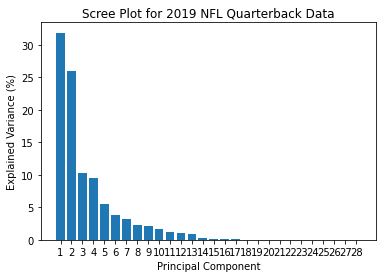

In [32]:
# Eliminate the columns with strings such as "Player" and "Team" leaving only
# numbers so that PCA can be performed.
new_qb_data = qb_data.drop(['Data','Player','Team'],axis=1) 

# To perform PCA, the data must be scaled. This adjusts the values so that each
# row has a mean of 0 and a standard deviation of 1.
scaled_qb_data = preprocessing.scale(new_qb_data)

# Perform PCA
qb_pca = PCA()
qb_pca.fit(scaled_qb_data)
qb_pca_data = pca.transform(scaled_qb_data)

# Calculate the percentage of variation each principal component accounts for.

percent_variance = np.round(qb_pca.explained_variance_ratio_*100, decimals=2)
labels = [str(x) for x in range(1, len(percent_variance)+1)]
plt.bar(x=range(1,len(percent_variance)+1), height=percent_variance, tick_label=labels)
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Component')
plt.title('Scree Plot for 2019 NFL Quarterback Data')
plt.show()


Most of the variance can be explained with the first 4 principal components. Prediction algorithms will be more accurate (but slower) if more principal components are included and vice versa.